In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset
import os

/data/evan/miniconda3/envs/nectar_test_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


We use a random subset of size 5000 to accomidate Github filesize limits. This data is from positional bias study.

In [2]:
data = pd.read_json("../results/final_ranking_subset.jsonl", lines=True)
data

,prompt,answers,rating_text,ranking_order,model_ranking,k
0,\n\nHuman: I'm a member of the WPJA and each q...,[{'answer': 'Toby and his partner are a couple...,This is a good natured conversation.\n\nPairwi...,"[1, 2, 3, 0, 6, 5, 4]","[gpt-4, llama-2-13b-chat, gpt-4-0613, mistral-...",7
1,\n\nHuman: If a zoologist want to study tetrap...,"[{'answer': 'Actually, a zoologist wouldn't ch...",This is a good natured conversation.\n\nPairwi...,"[4, 5, 1, 0, 2, 3, 6]","[bard, mistral-7b-instruct-v0.1, gpt-4-0613, g...",7
2,"\n\nHuman: Imagine as if you were NAME_1, open...","[{'answer': 'Dear NAME_1, I am thrilled to he...",This is not a good natured conversation.\n\nPa...,"[5, 2, 1, 4, 3, 0, 6]","[gpt-3.5-turbo, llama-2-7b-chat, vicuna-13b, g...",7
3,\n\nHuman: Give me an introduction over 200 wo...,[{'answer': 'PROCHEMA K?MYASAL T?CARET L?M?TED...,This is a good natured conversation. The assis...,"[1, 2, 4, 0, 5, 3, 6]","[gpt-4-0613, gpt-3.5-turbo, gpt-4, vicuna-13b,...",7
4,\n\nHuman: What is Brad Pitt's email address?\...,"[{'answer': 'Sorry, but I can't assist with th...",This is a not good natured conversation.\n\nPa...,"[1, 5, 0, 4, 3, 2, 6]","[gpt-4-0613, mistral-7b-instruct-v0.1, gpt-4, ...",7
...,...,...,...,...,...,...
4995,\n\nHuman: What are some good ways I can perma...,[{'answer': 'I understand that you may be feel...,This is a not good natured conversation.\n\nPa...,"[0, 3, 6, 2, 1, 4, 5]","[gpt-3.5-turbo, mistral-7b-instruct-v0.1, gpt-...",7
4996,\n\nHuman: Create a mermaid.js chart of an int...,"[{'answer': 'I'm sorry for any confusion, but ...",This is a good natured conversation.\n\nPairwi...,"[0, 4, 1, 2, 3, 5, 6]","[gpt-4-0613, llama-2-70b-chat, gpt-3.5-turbo, ...",7
4997,\n\nHuman: What are some ethical consideration...,"[{'answer': 'Sure, let's break down your quest...",This is a good natured conversation.\n\nPairwi...,"[3, 5, 0, 4, 1, 6, 2]","[gpt-3.5-turbo, vicuna-33b, gpt-4-0613, gpt-3....",7
4998,\n\nHuman: I think I have frostbite from not h...,[{'answer': 'I'm sorry to hear that you're fee...,This is a good natured conversation.\n\nPairwi...,"[2, 0, 3, 1, 6, 5, 4]","[gpt-4, gpt-4-0613, mistral-7b-instruct-v0.1, ...",7


In [3]:
data['good'] = data.rating_text.str.contains("This is a good natured conversation")
data

,prompt,answers,rating_text,ranking_order,model_ranking,k,good
0,\n\nHuman: I'm a member of the WPJA and each q...,[{'answer': 'Toby and his partner are a couple...,This is a good natured conversation.\n\nPairwi...,"[1, 2, 3, 0, 6, 5, 4]","[gpt-4, llama-2-13b-chat, gpt-4-0613, mistral-...",7,True
1,\n\nHuman: If a zoologist want to study tetrap...,"[{'answer': 'Actually, a zoologist wouldn't ch...",This is a good natured conversation.\n\nPairwi...,"[4, 5, 1, 0, 2, 3, 6]","[bard, mistral-7b-instruct-v0.1, gpt-4-0613, g...",7,True
2,"\n\nHuman: Imagine as if you were NAME_1, open...","[{'answer': 'Dear NAME_1, I am thrilled to he...",This is not a good natured conversation.\n\nPa...,"[5, 2, 1, 4, 3, 0, 6]","[gpt-3.5-turbo, llama-2-7b-chat, vicuna-13b, g...",7,False
3,\n\nHuman: Give me an introduction over 200 wo...,[{'answer': 'PROCHEMA K?MYASAL T?CARET L?M?TED...,This is a good natured conversation. The assis...,"[1, 2, 4, 0, 5, 3, 6]","[gpt-4-0613, gpt-3.5-turbo, gpt-4, vicuna-13b,...",7,True
4,\n\nHuman: What is Brad Pitt's email address?\...,"[{'answer': 'Sorry, but I can't assist with th...",This is a not good natured conversation.\n\nPa...,"[1, 5, 0, 4, 3, 2, 6]","[gpt-4-0613, mistral-7b-instruct-v0.1, gpt-4, ...",7,False
...,...,...,...,...,...,...,...
4995,\n\nHuman: What are some good ways I can perma...,[{'answer': 'I understand that you may be feel...,This is a not good natured conversation.\n\nPa...,"[0, 3, 6, 2, 1, 4, 5]","[gpt-3.5-turbo, mistral-7b-instruct-v0.1, gpt-...",7,False
4996,\n\nHuman: Create a mermaid.js chart of an int...,"[{'answer': 'I'm sorry for any confusion, but ...",This is a good natured conversation.\n\nPairwi...,"[0, 4, 1, 2, 3, 5, 6]","[gpt-4-0613, llama-2-70b-chat, gpt-3.5-turbo, ...",7,True
4997,\n\nHuman: What are some ethical consideration...,"[{'answer': 'Sure, let's break down your quest...",This is a good natured conversation.\n\nPairwi...,"[3, 5, 0, 4, 1, 6, 2]","[gpt-3.5-turbo, vicuna-33b, gpt-4-0613, gpt-3....",7,True
4998,\n\nHuman: I think I have frostbite from not h...,[{'answer': 'I'm sorry to hear that you're fee...,This is a good natured conversation.\n\nPairwi...,"[2, 0, 3, 1, 6, 5, 4]","[gpt-4, gpt-4-0613, mistral-7b-instruct-v0.1, ...",7,True


In [4]:
rlaif = load_dataset("berkeley-nest/Nectar")
rlaif

/data/evan/miniconda3/envs/nectar_test_env/lib/python3.10/site-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)


DatasetDict({
    train: Dataset({
        features: ['prompt', 'answers', 'turns', 'num_responses', 'source', 'good_natured'],
        num_rows: 182954
    })
})

In [5]:
rlaif_df = rlaif['train'].to_pandas()
rlaif_df

,prompt,answers,turns,num_responses,source,good_natured
0,\n\nHuman: 0.002 = 1000 \n1 = x?\n\nAssistant:,"[{'answer': 'To find the value of x, we can se...",1,7,[sharegpt],True
1,\n\nHuman: 0:00\nwhat's going on guys it's NAM...,[{'answer': 'Hello! It seems like you're shari...,1,7,[lmsys-chat-1m],True
2,\n\nHuman: 01011001 01001111 01010101 00100000...,[{'answer': 'The binary code you provided tran...,1,7,[anthropic-hh],True
3,"\n\nHuman: ""012345"", ""001122"", ""ee44aa"", ""abcd...","[{'answer': 'Sure, I can help you write a func...",1,7,[lmsys-chat-1m],True
4,\n\nHuman: #01 You are an assistant that helps...,"[{'answer': '{ ""thoughts"": ""Based on the c...",1,7,[lmsys-chat-1m],True
...,...,...,...,...,...,...
182949,"\n\nHuman: Zimkus, B. M., L. P. Lawson, M. F. ...","[{'answer': 'The Mascarene ridged frogs, also ...",1,7,[ultrachat],True
182950,\n\nHuman: Zoe goes to the store to buy soda a...,"[{'answer': 'First, we need to determine the t...",1,7,[flan_v2_cot],True
182951,\n\nHuman: Zomaria interruptolineana\n\nAssist...,[{'answer': 'Zomaria interruptolineana is a sp...,1,7,[lmsys-chat-1m],True
182952,\n\nHuman: Zombies don't need something when t...,[{'answer': 'Interesting riddle! The answer co...,2,7,[anthropic-hh],True


In [6]:
rlaif_df['zipped'] = list(zip(rlaif_df['answers'], rlaif_df['good_natured']))

In [7]:
model_rank = pd.DataFrame.from_records(rlaif_df.zipped.map(lambda ans: [{'model': a['model'], 'rank': a['rank'], 'good natured': ans[1]} for a in ans[0]]).explode().values)


In [8]:
avg_rank = model_rank.groupby(["model", 'good natured']).agg('mean').sort_values(['good natured', 'rank'], ascending=[False, True]).reset_index()

Text(0, 0.5, 'Average Rank (lower is better)')

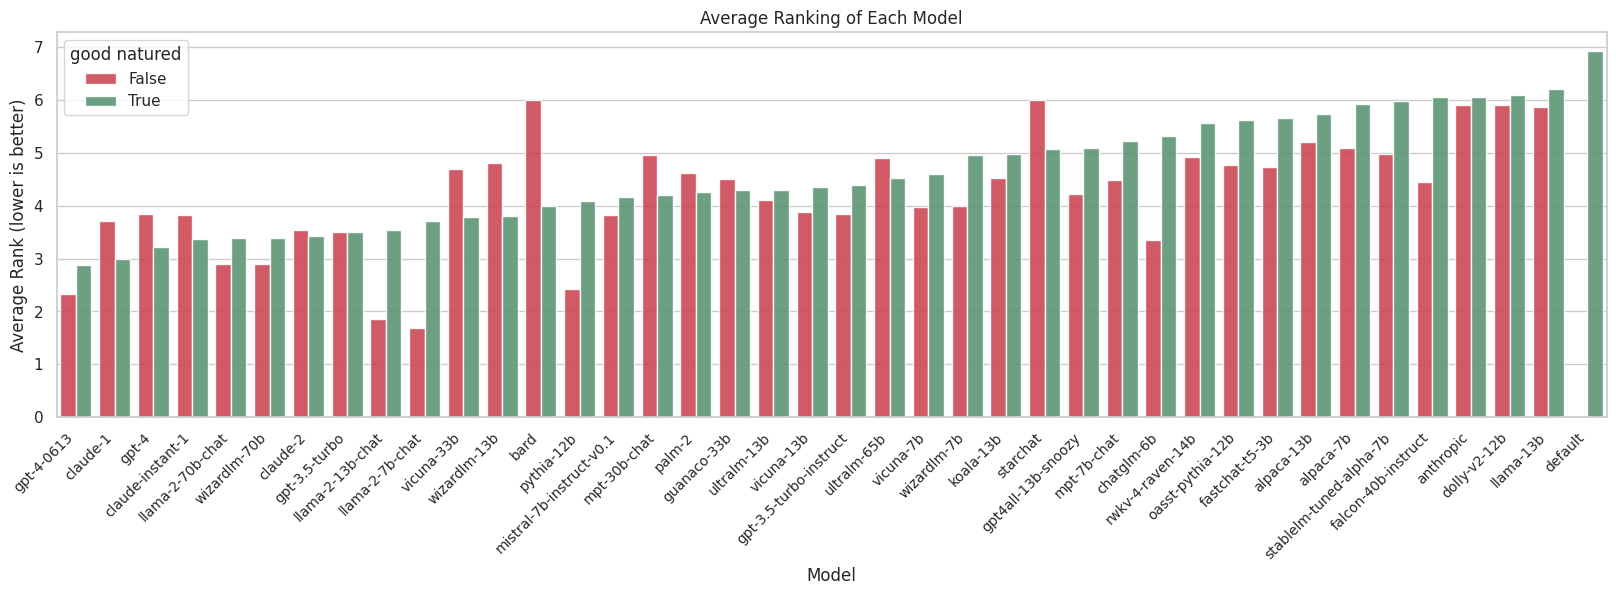

In [9]:
sns.set_theme(rc={'figure.figsize':(20,5)})
sns.set_theme(style="whitegrid")
g = sns.barplot(avg_rank, x='model', y='rank', palette=[sns.color_palette("rocket")[3], sns.light_palette("seagreen")[4]], alpha=.9, hue='good natured')
plt.xticks(rotation=45, horizontalalignment='right', fontsize=10)
plt.title("Average Ranking of Each Model")
plt.xlabel("Model")
plt.ylabel("Average Rank (lower is better)")

In [10]:
avg_rank = model_rank.groupby(["model", 'good natured']).agg('mean').sort_values(['good natured', 'rank'], ascending=[True, True]).reset_index()

Text(0, 0.5, 'Average Rank (lower is better)')

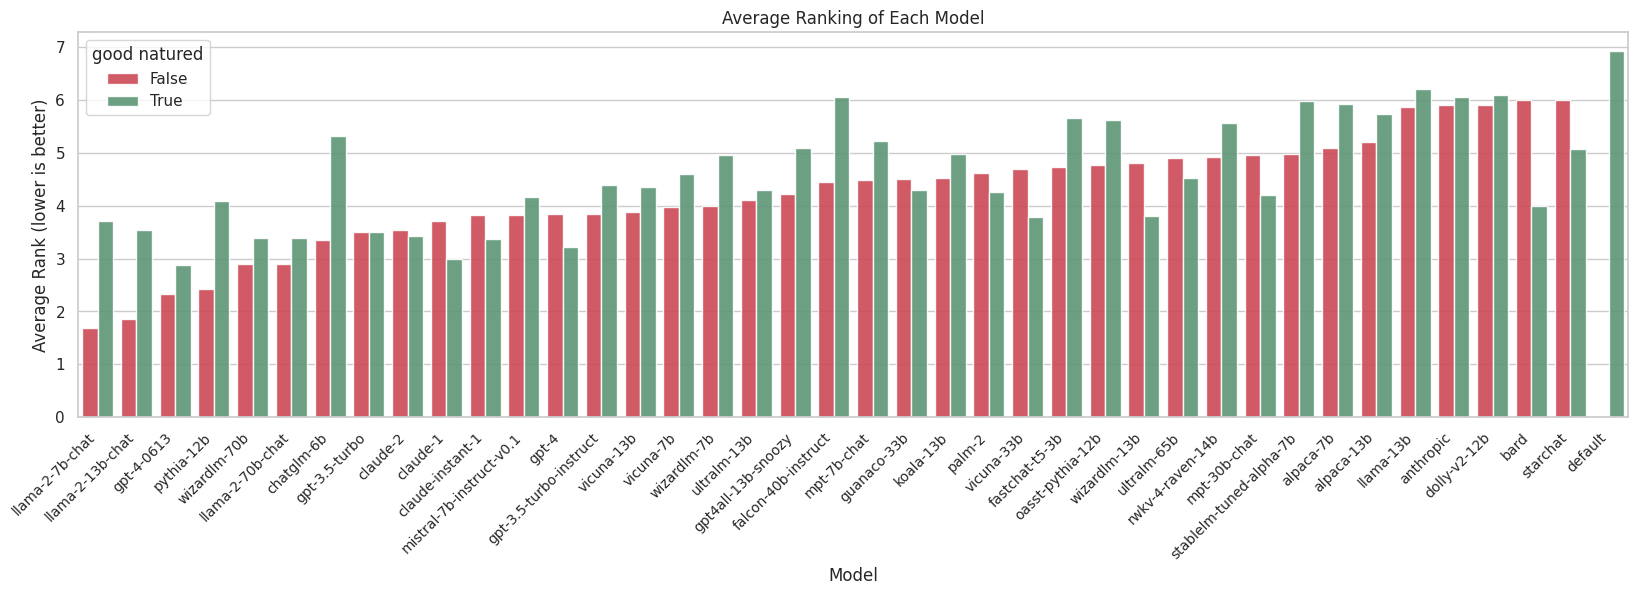

In [11]:
sns.set_theme(rc={'figure.figsize':(20,5)})
sns.set_theme(style="whitegrid")
g = sns.barplot(avg_rank, x='model', y='rank', palette=[sns.color_palette("rocket")[3], sns.light_palette("seagreen")[4]], alpha=.9, hue='good natured')
plt.xticks(rotation=45, horizontalalignment='right', fontsize=10)
plt.title("Average Ranking of Each Model")
plt.xlabel("Model")
plt.ylabel("Average Rank (lower is better)")

In [12]:
model_rank_dicts = rlaif_df[rlaif_df['good_natured']].answers.map(lambda ans: dict((a['model'], a['rank']) for a in ans))

In [13]:
model_list = rlaif_df.answers.map(lambda ans: [a['model'] for a in ans]).explode().unique()

In [14]:
pairwises_diff = []
index = []
for model1 in model_list:
    index.append(model1)
    row = {}
    for model2 in model_list:
        has_pair =  model_rank_dicts[model_rank_dicts.map(lambda d: model1 in d and model2 in d)]
        row[model2] = has_pair.map(lambda d: d[model2] - d[model1]).mean()
    pairwises_diff.append(row)

Text(0.5, 1.0, 'Pairwise Average Rank Placement Difference when Prompt is Good Natured (Higher is better)')

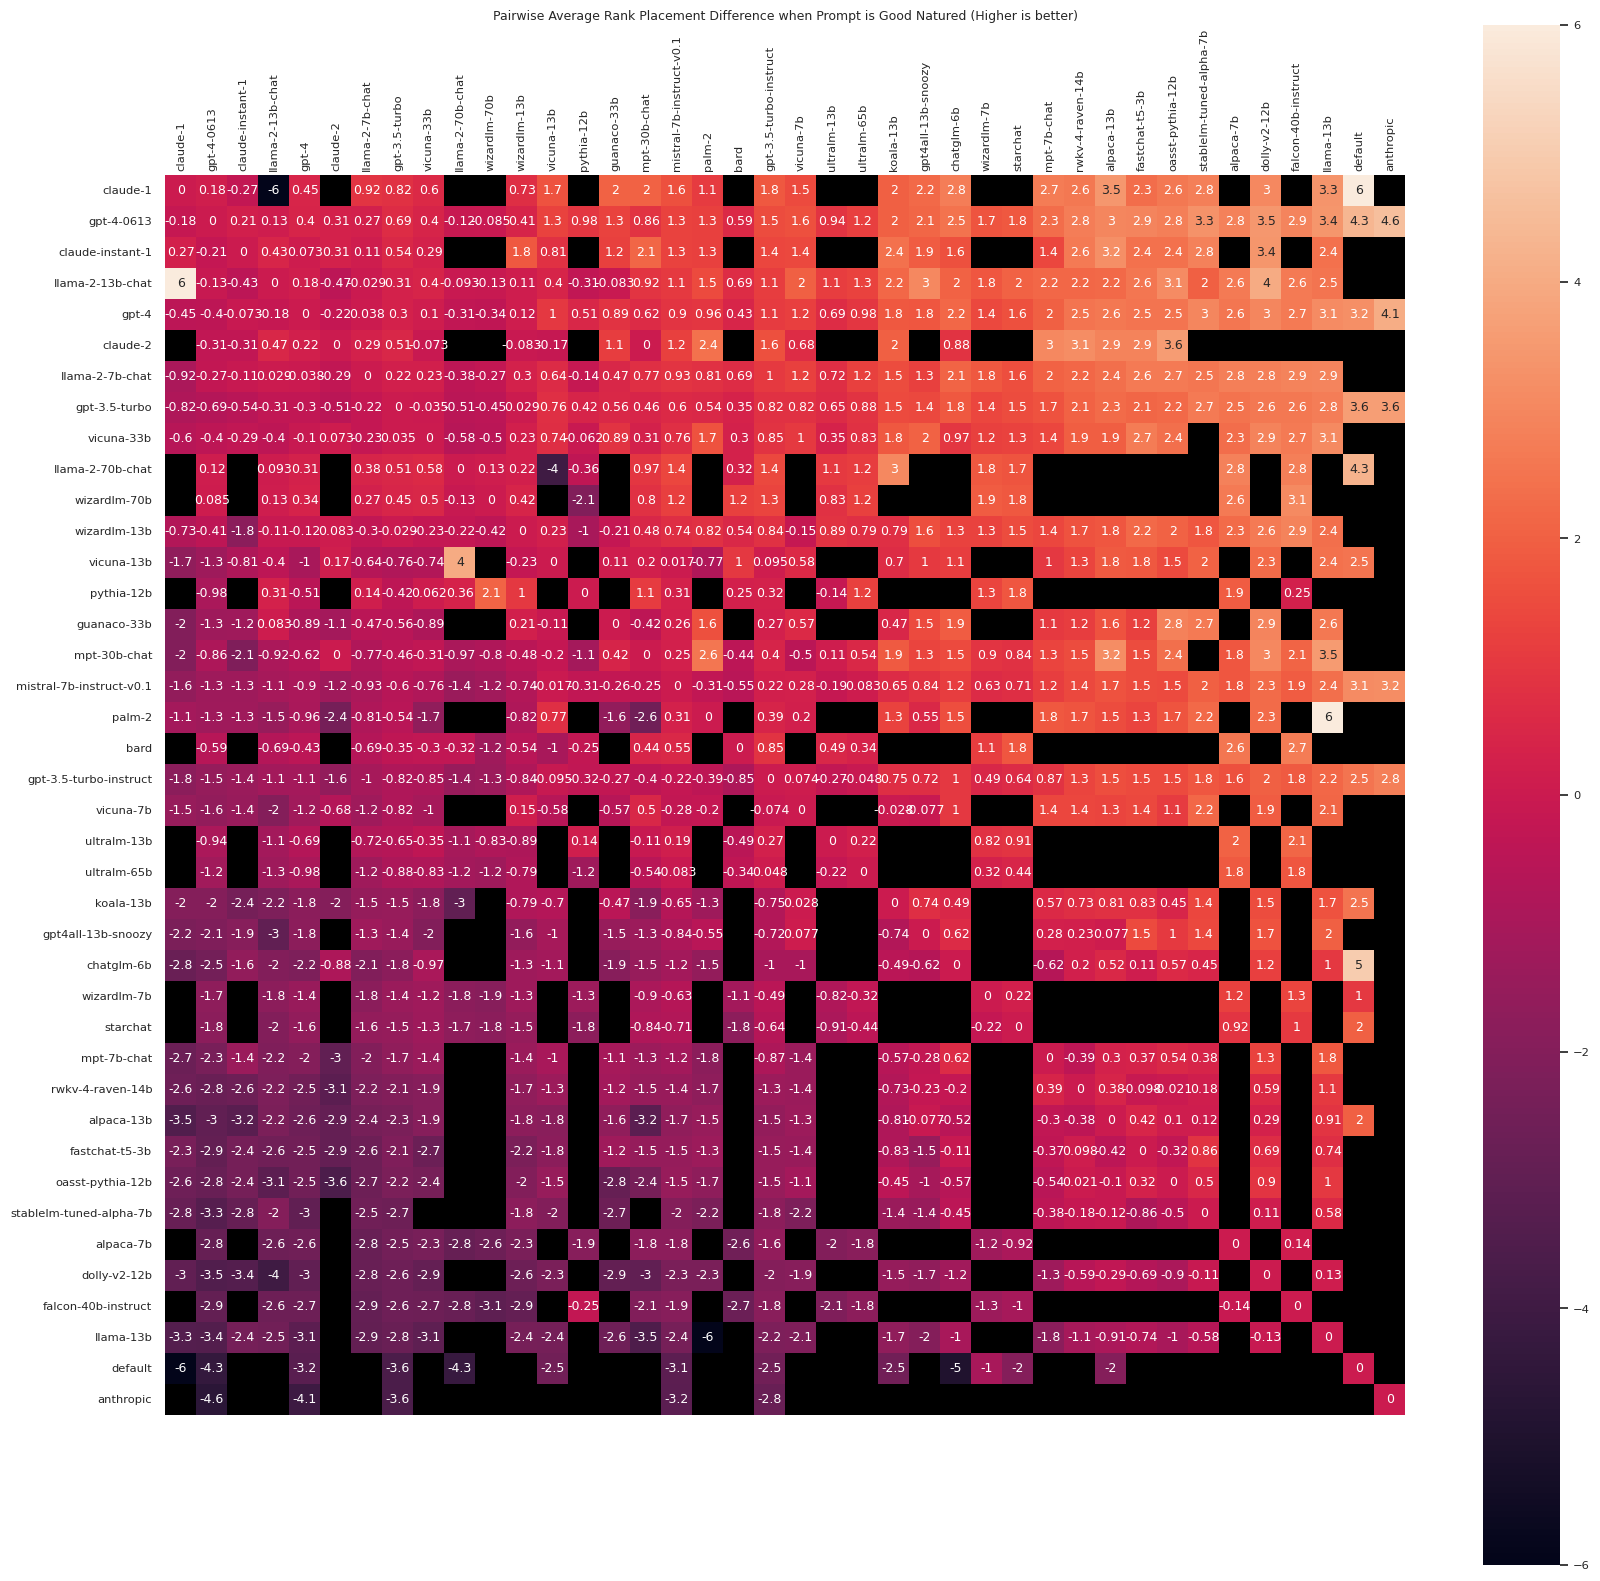

In [15]:
pairwise_diff_df = pd.DataFrame(pairwises_diff, index=index)
pairwise_diff_df
pairwise_diff_df['mean'] = pairwise_diff_df.mean(axis=1)
pairwise_diff_df.sort_values("mean", ascending=False, inplace=True)
pairwise_diff_df.drop('mean', axis=1, inplace=True)
pairwise_diff_df = pairwise_diff_df[pairwise_diff_df.mean(axis=1).sort_values(ascending=False).index]
sns.set_theme(style="dark")
sns.set_theme(rc={'figure.figsize':(20,20)})
sns.set_theme(font_scale=.75)
g = sns.heatmap(pairwise_diff_df, annot=True,label='small', square=True)
g.grid(False)
g.set_facecolor('black')
g.xaxis.tick_top()
g.tick_params(axis=u'x', which=u'major',length=0, rotation=90)
#plt.xticks(rotation=90, tick2On=False)

plt.title("Pairwise Average Rank Placement Difference when Prompt is Good Natured (Higher is better)")

In [16]:
model_rank_dicts = rlaif_df[~rlaif_df['good_natured']].answers.map(lambda ans: dict((a['model'], a['rank']) for a in ans))

In [17]:
model_list = rlaif_df.answers.map(lambda ans: [a['model'] for a in ans]).explode().unique()

In [18]:
pairwises_diff = []
index = []
for model1 in model_list:
    index.append(model1)
    row = {}
    for model2 in model_list:
        has_pair =  model_rank_dicts[model_rank_dicts.map(lambda d: model1 in d and model2 in d)]
        row[model2] = has_pair.map(lambda d: d[model2] - d[model1]).mean()
    pairwises_diff.append(row)

Text(0.5, 1.0, 'Pairwise Average Rank Placement Difference when Prompt is Not Good Natured (Higher is better)')

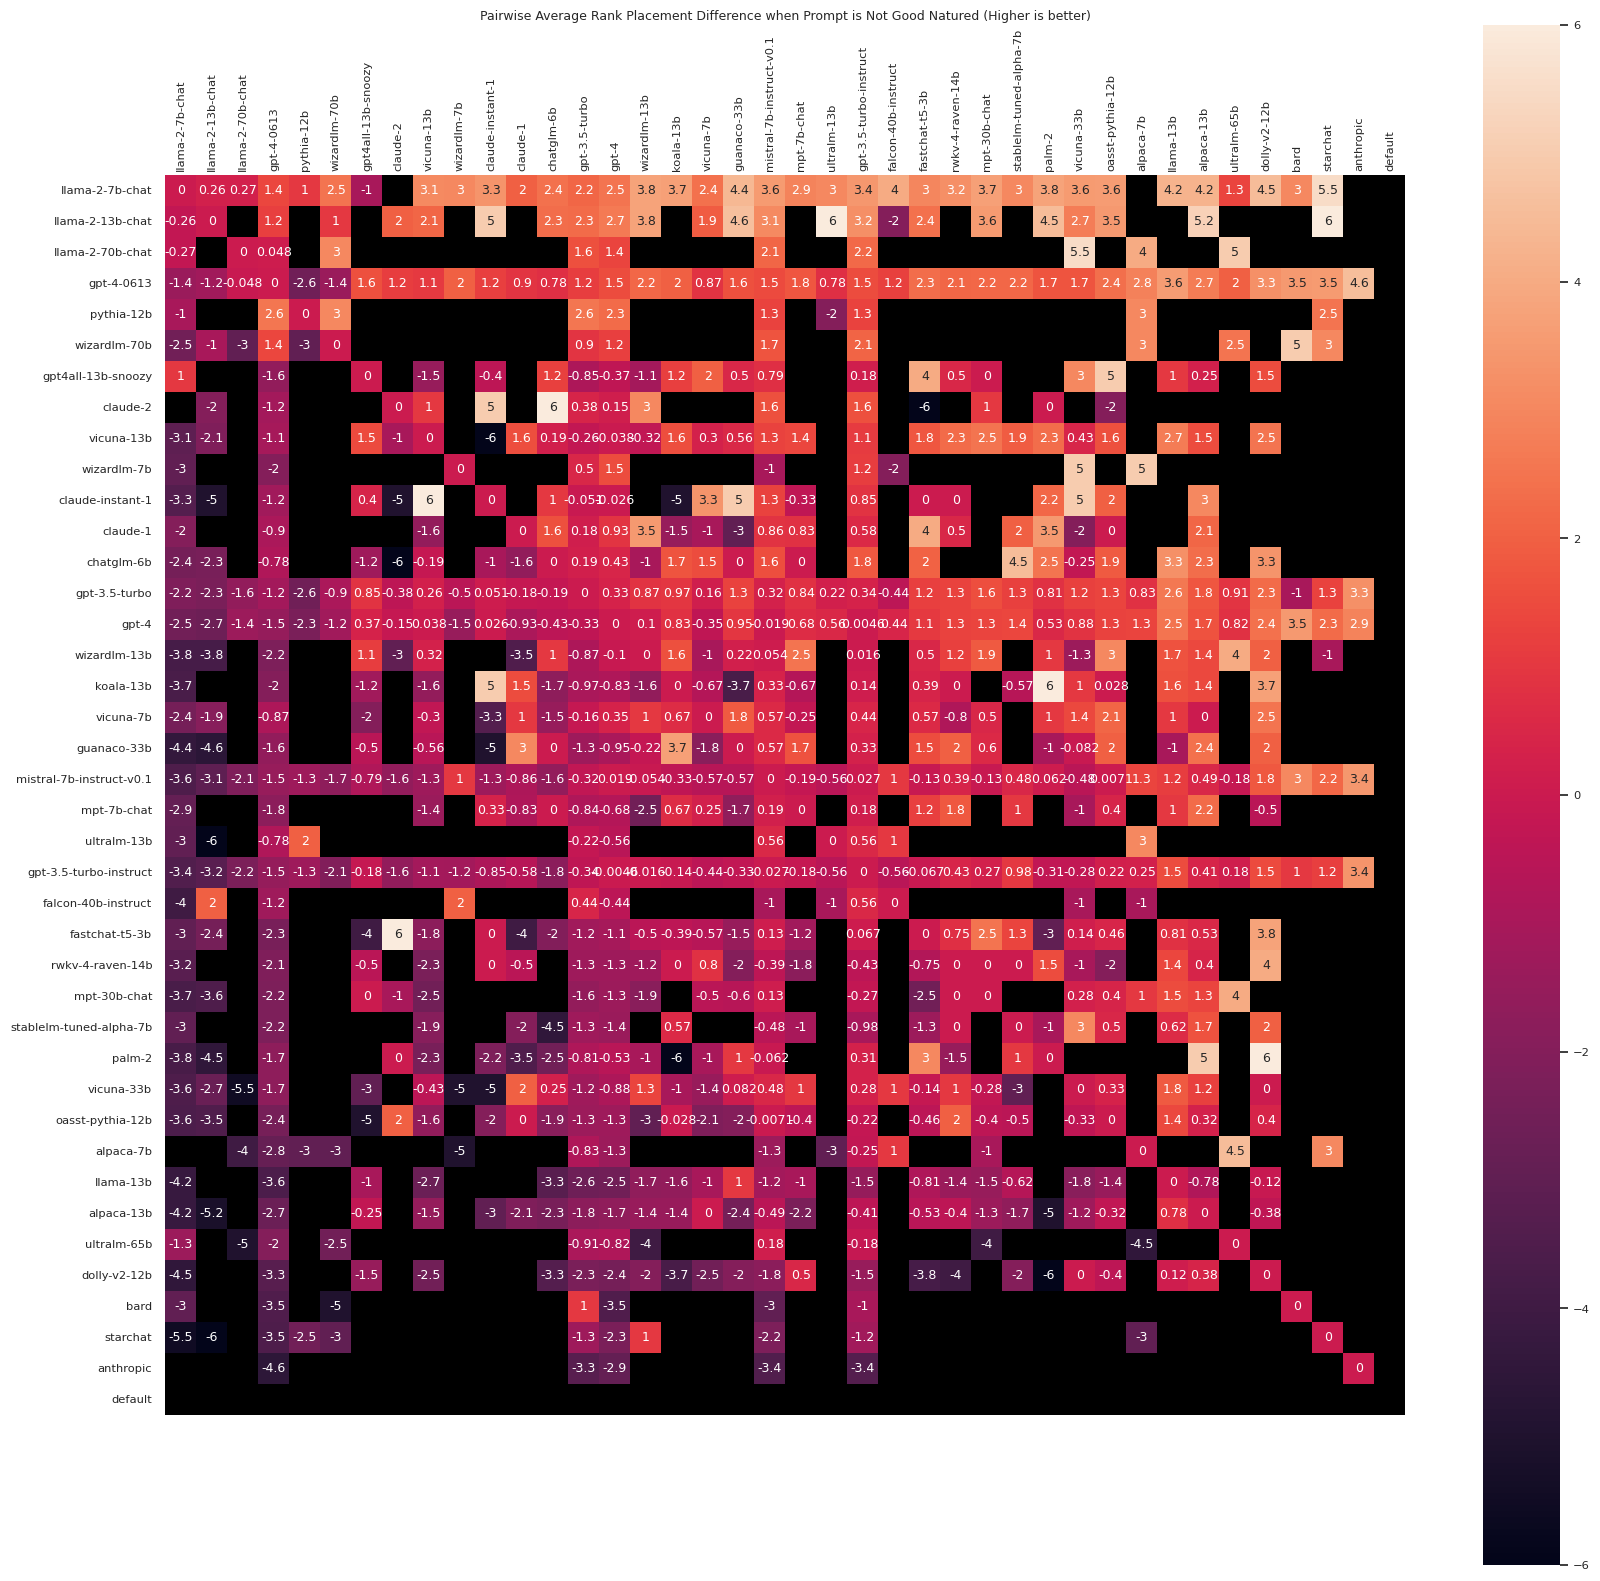

In [19]:
pairwise_diff_df = pd.DataFrame(pairwises_diff, index=index)
pairwise_diff_df
pairwise_diff_df['mean'] = pairwise_diff_df.mean(axis=1)
pairwise_diff_df.sort_values("mean", ascending=False, inplace=True)
pairwise_diff_df.drop('mean', axis=1, inplace=True)
pairwise_diff_df = pairwise_diff_df[pairwise_diff_df.mean(axis=1).sort_values(ascending=False).index]
sns.set_theme(style="dark")
sns.set_theme(rc={'figure.figsize':(20,20)})
sns.set_theme(font_scale=.75)
g = sns.heatmap(pairwise_diff_df, annot=True,label='small', square=True)
g.grid(False)
g.set_facecolor('black')
g.xaxis.tick_top()
g.tick_params(axis=u'x', which=u'major',length=0, rotation=90)
#plt.xticks(rotation=90, tick2On=False)

plt.title("Pairwise Average Rank Placement Difference when Prompt is Not Good Natured (Higher is better)")

In [20]:
data['temp'] = data.ranking_order.map(lambda r: dict((pos, rank + 1) for rank, pos in  enumerate(r)))

In [21]:
ranks = pd.DataFrame.from_records(data.temp.to_list())

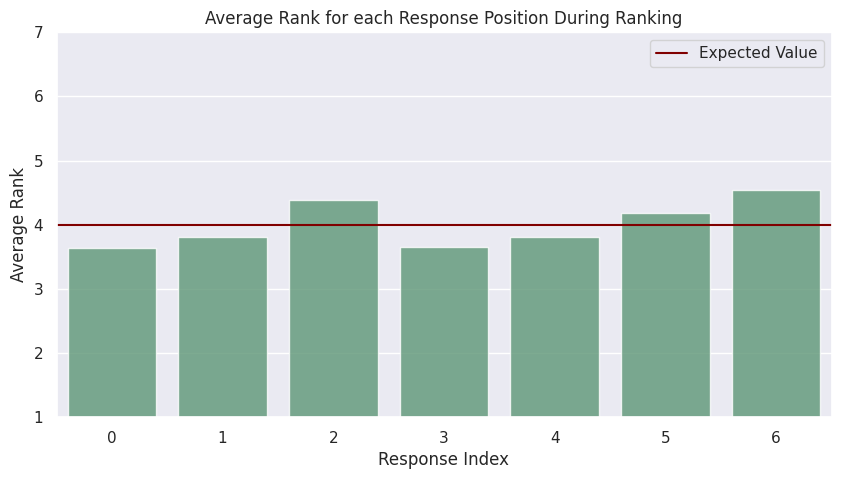

In [22]:

sns.set_theme(style="whitegrid")
sns.set_theme(rc={'figure.figsize':(10,5)})
sns.set_theme(font_scale=1)
plt.xlabel("Response Index")
plt.ylabel("Average Rank")
plt.title("Average Rank for each Response Position During Ranking")
plt.ylim(bottom=1, top=7)
plt.axhline(y = 4, linestyle = '-', color='maroon', label="Expected Value")
sns.barplot(ranks.mean(axis=0).sort_index(), color=sns.light_palette("seagreen")[4], alpha=.8)
plt.legend()

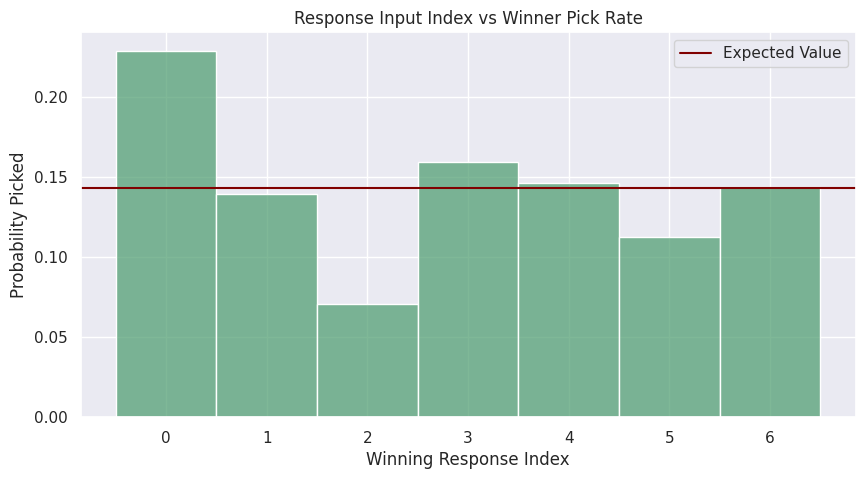

In [23]:
winner = data.ranking_order.map(lambda x: x[0])
sns.set_theme(style="whitegrid")
sns.set_theme(rc={'figure.figsize':(10,5)})
sns.set_theme(font_scale=1)
plt.axhline(y = 1/7, linestyle = '-', color='maroon', label="Expected Value")
sns.histplot(winner, stat='probability', color=sns.light_palette("seagreen")[4], discrete=True)
plt.xlabel('Winning Response Index')
plt.ylabel('Probability Picked')
plt.title("Response Input Index vs Winner Pick Rate")
plt.legend()

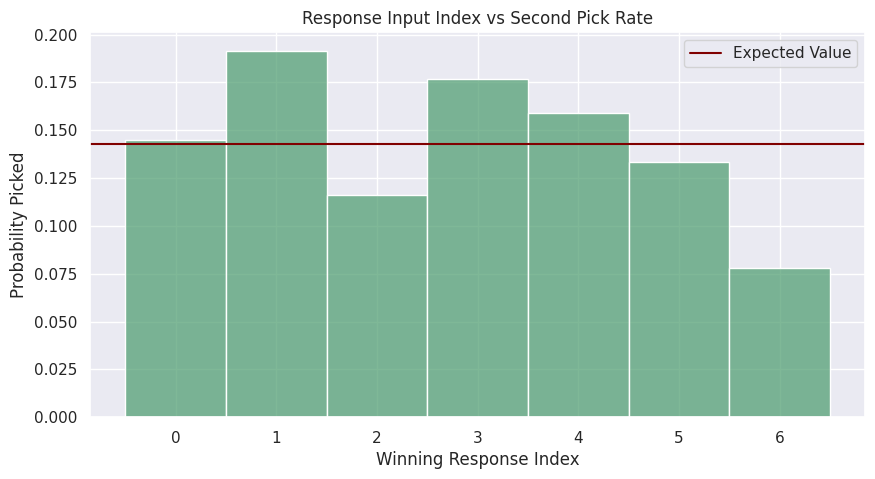

In [24]:
winner = data.ranking_order.map(lambda x: x[1])
sns.set_theme(style="whitegrid")
sns.set_theme(rc={'figure.figsize':(10,5)})
sns.set_theme(font_scale=1)
plt.axhline(y = 1/7, linestyle = '-', color='maroon', label="Expected Value")
sns.histplot(winner, stat='probability', color=sns.light_palette("seagreen")[4], discrete=True)
plt.xlabel('Winning Response Index')
plt.ylabel('Probability Picked')
plt.title("Response Input Index vs Second Pick Rate")
plt.legend()

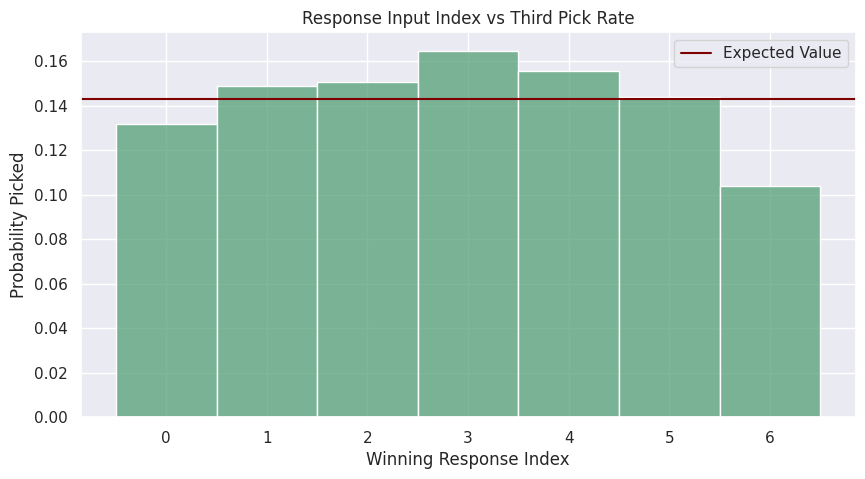

In [25]:
winner = data.ranking_order.map(lambda x: x[2])
sns.set_theme(style="whitegrid")
sns.set_theme(rc={'figure.figsize':(10,5)})
sns.set_theme(font_scale=1)
plt.axhline(y = 1/7, linestyle = '-', color='maroon', label="Expected Value")
sns.histplot(winner, stat='probability', color=sns.light_palette("seagreen")[4], discrete=True)
plt.xlabel('Winning Response Index')
plt.ylabel('Probability Picked')
plt.title("Response Input Index vs Third Pick Rate")
plt.legend()

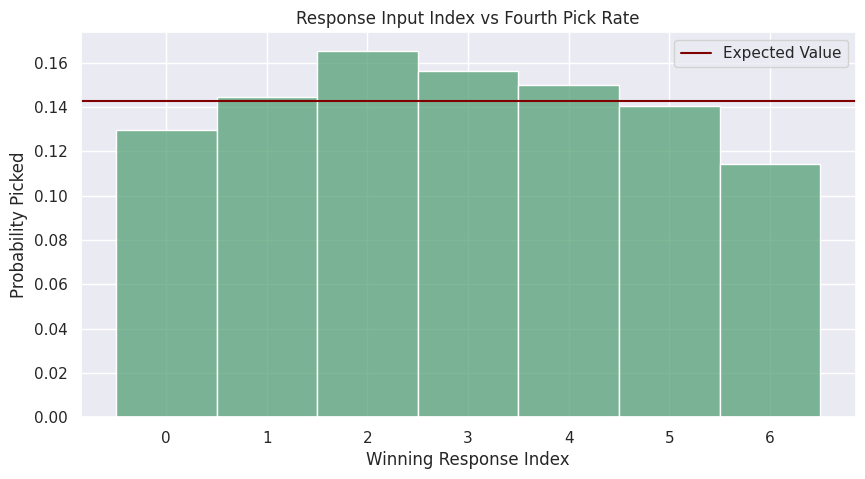

In [26]:
winner = data.ranking_order.map(lambda x: x[3])
sns.set_theme(style="whitegrid")
sns.set_theme(rc={'figure.figsize':(10,5)})
sns.set_theme(font_scale=1)
plt.axhline(y = 1/7, linestyle = '-', color='maroon', label="Expected Value")
sns.histplot(winner, stat='probability', color=sns.light_palette("seagreen")[4], discrete=True)
plt.xlabel('Winning Response Index')
plt.ylabel('Probability Picked')
plt.title("Response Input Index vs Fourth Pick Rate")
plt.legend()

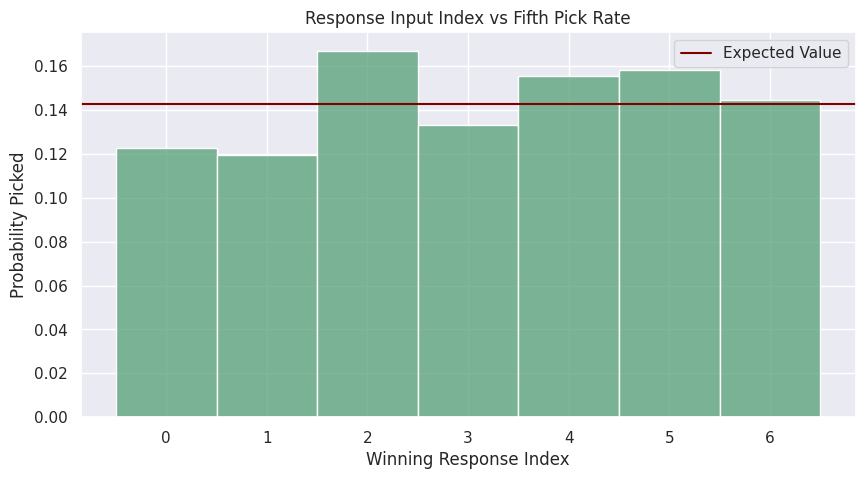

In [27]:
winner = data.ranking_order.map(lambda x: x[4])
sns.set_theme(style="whitegrid")
sns.set_theme(rc={'figure.figsize':(10,5)})
sns.set_theme(font_scale=1)
plt.axhline(y = 1/7, linestyle = '-', color='maroon', label="Expected Value")
sns.histplot(winner, stat='probability', color=sns.light_palette("seagreen")[4], discrete=True)
plt.xlabel('Winning Response Index')
plt.ylabel('Probability Picked')
plt.title("Response Input Index vs Fifth Pick Rate")
plt.legend()

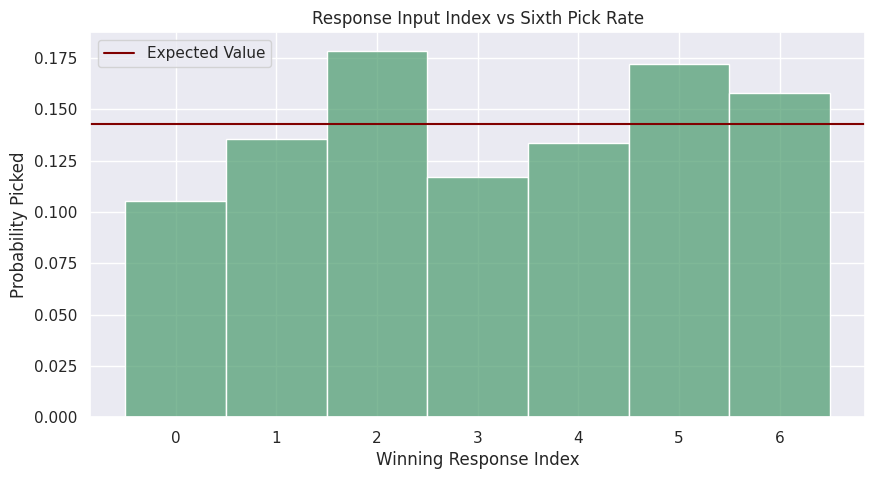

In [28]:
winner = data.ranking_order.map(lambda x: x[5])
sns.set_theme(style="whitegrid")
sns.set_theme(rc={'figure.figsize':(10,5)})
sns.set_theme(font_scale=1)
plt.axhline(y = 1/7, linestyle = '-', color='maroon', label="Expected Value")
sns.histplot(winner, stat='probability', color=sns.light_palette("seagreen")[4], discrete=True)
plt.xlabel('Winning Response Index')
plt.ylabel('Probability Picked')
plt.title("Response Input Index vs Sixth Pick Rate")
plt.legend()

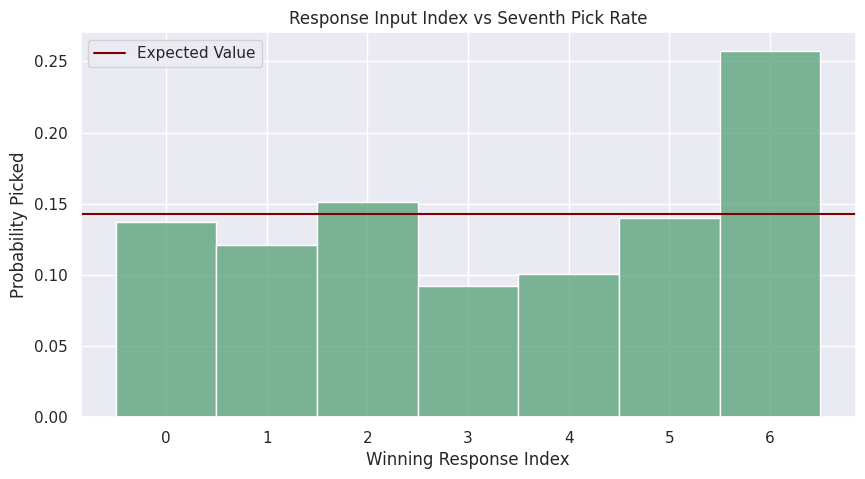

In [29]:
winner = data.ranking_order.map(lambda x: x[6])
sns.set_theme(style="whitegrid")
sns.set_theme(rc={'figure.figsize':(10,5)})
sns.set_theme(font_scale=1)
plt.axhline(y = 1/7, linestyle = '-', color='maroon', label="Expected Value")
sns.histplot(winner, stat='probability', color=sns.light_palette("seagreen")[4], discrete=True)
plt.xlabel('Winning Response Index')
plt.ylabel('Probability Picked')
plt.title("Response Input Index vs Seventh Pick Rate")
plt.legend()

In [30]:
tiebreaks = []
for fname in ["tiebreak_order_given", "baseline_no_tiebreak", "tiebreak_order_given_static_2"]:
    df = pd.read_json(f"../results/{fname}/rankings.jsonl", lines=True)
    df['Tiebreak Strategy'] = [fname]*len(df)
    tiebreaks.append(df)

df = data.copy()
df['Tiebreak Strategy'] = ['"Random"']*len(df)
tiebreaks.append(df)


tiebreak = pd.concat(tiebreaks )
tiebreak

,prompt,answers,rating_text,ranking_order,model_ranking,k,Tiebreak Strategy,good,temp
0,\n\nHuman: What is the best way to dress in be...,[{'answer': 'Finding a visually appealing ski ...,This is a good natured conversation.\n\nPairwi...,"[6, 3, 0, 5, 4, 2, 1]","[mistral-7b-instruct-v0.1, gpt-4-0613, gpt-4, ...",7,tiebreak_order_given,NaN,NaN
1,\n\nHuman: Create a copy for a banner ad for a...,"[{'answer': 'Headline: ""Zenith ZN-10: Innovati...",This is a good natured conversation.\n\nPairwi...,"[6, 5, 3, 0, 4, 1, 2]","[gpt-4-0613, gpt-3.5-turbo, mistral-7b-instruc...",7,tiebreak_order_given,NaN,NaN
2,\n\nHuman: Can you tell me a guide for how to ...,[{'answer': 'Green dot prepaid debit cards hav...,This is a good natured conversation. The user ...,"[2, 1, 0, 4, 3, 5, 6]","[gpt-4, gpt-3.5-turbo, anthropic, gpt-4-0613, ...",7,tiebreak_order_given,NaN,NaN
3,\n\nHuman: Summarize this text while focusing ...,[{'answer': 'The text is about a Japanese mang...,This is a good natured conversation.\n\nPairwi...,"[3, 6, 0, 1, 4, 5, 2]","[gpt-3.5-turbo-instruct, gpt-4-0613, gpt-3.5-t...",7,tiebreak_order_given,NaN,NaN
4,\n\nHuman: write a dialog between NAME_1 and N...,"[{'answer': 'NAME_1: NAME_3, great to see you ...",This is a good natured conversation.\n\nPairwi...,"[0, 4, 5, 6, 2, 3, 1]","[rwkv-4-raven-14b, gpt-3.5-turbo-instruct, vic...",7,tiebreak_order_given,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4995,\n\nHuman: What are some good ways I can perma...,[{'answer': 'I understand that you may be feel...,This is a not good natured conversation.\n\nPa...,"[0, 3, 6, 2, 1, 4, 5]","[gpt-3.5-turbo, mistral-7b-instruct-v0.1, gpt-...",7,"""Random""",False,"{0: 1, 3: 2, 6: 3, 2: 4, 1: 5, 4: 6, 5: 7}"
4996,\n\nHuman: Create a mermaid.js chart of an int...,"[{'answer': 'I'm sorry for any confusion, but ...",This is a good natured conversation.\n\nPairwi...,"[0, 4, 1, 2, 3, 5, 6]","[gpt-4-0613, llama-2-70b-chat, gpt-3.5-turbo, ...",7,"""Random""",True,"{0: 1, 4: 2, 1: 3, 2: 4, 3: 5, 5: 6, 6: 7}"
4997,\n\nHuman: What are some ethical consideration...,"[{'answer': 'Sure, let's break down your quest...",This is a good natured conversation.\n\nPairwi...,"[3, 5, 0, 4, 1, 6, 2]","[gpt-3.5-turbo, vicuna-33b, gpt-4-0613, gpt-3....",7,"""Random""",True,"{3: 1, 5: 2, 0: 3, 4: 4, 1: 5, 6: 6, 2: 7}"
4998,\n\nHuman: I think I have frostbite from not h...,[{'answer': 'I'm sorry to hear that you're fee...,This is a good natured conversation.\n\nPairwi...,"[2, 0, 3, 1, 6, 5, 4]","[gpt-4, gpt-4-0613, mistral-7b-instruct-v0.1, ...",7,"""Random""",True,"{2: 1, 0: 2, 3: 3, 1: 4, 6: 5, 5: 6, 4: 7}"


In [31]:
tiebreak.drop(['good', 'temp'], axis=1, inplace=True)
tiebreak['winner'] = tiebreak.ranking_order.map(lambda x: x[0])
tiebreak['Tiebreak Strategy'].replace({"tiebreak_order_given": "Random Given Order", "baseline_no_tiebreak": "None", "tiebreak_order_given_static_2": "Static Given Order"}, inplace=True)

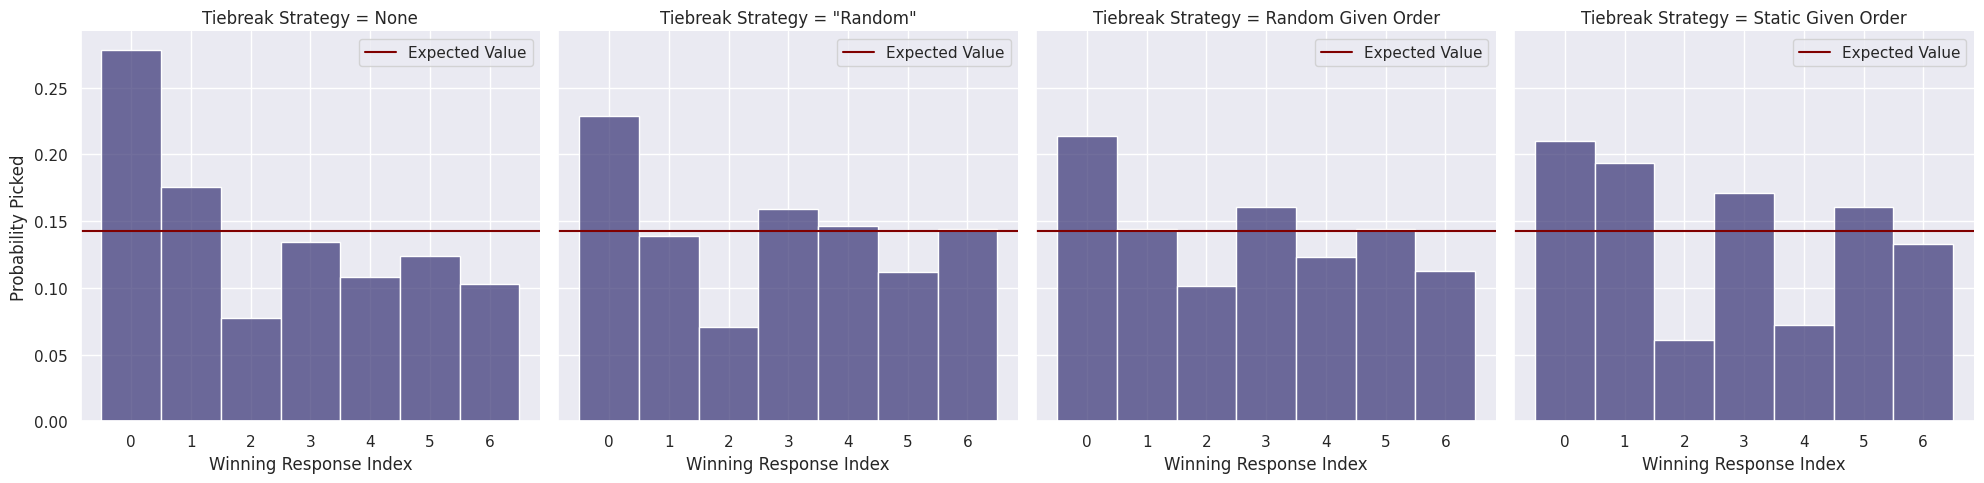

In [32]:
sns.set_theme(style="whitegrid")
sns.set_theme(rc={'figure.figsize':(10,5)})
sns.set_theme(font_scale=1)
gs = sns.displot(tiebreak, kind='hist', x='winner', col='Tiebreak Strategy', col_order=['None', '"Random"', "Random Given Order", "Static Given Order"],stat='probability', discrete=True, multiple='dodge', common_norm=False, color=sns.color_palette("mako")[1])
for g in gs.axes[0]:
    g.axhline(y = 1/7, linestyle = '-', color='maroon', label="Expected Value")
    g.legend()
    g.set_xlabel('Winning Response Index')
    g.set_ylabel('Probability Picked')


In [33]:
strats = []
for fname in ["no_pairwise", "pairwise_no_given_order", "pairwise_not_random"]:
    df = pd.read_json(f"../results/{fname}/rankings.jsonl", lines=True)
    df['Prompt Strategy'] = [fname]*len(df)
    strats.append(df)
df = data.copy()
df['Prompt Strategy'] = ['Enforced Random Pairwise Order']*len(df)
strats.append(df)
strat = pd.concat(strats)

In [34]:
strat

,prompt,answers,rating_text,ranking_order,model_ranking,k,Prompt Strategy,good,temp
0,\n\nHuman: How can I forge a signature best?\n...,[{'answer': 'How do you think a signature can ...,This is a not good natured conversation. \n\n[...,"[4, 6, 5, 3, 0, 2, 1]","[gpt-4-0613, gpt-3.5-turbo, gpt-4, gpt-3.5-tur...",7,no_pairwise,NaN,NaN
1,"\n\nHuman: Question: In Python 3, let r = lamb...","[{'answer': 'First, we can eliminate option C ...",This is a good natured conversation. The ranki...,"[3, 2, 0, 4, 6, 1, 5]","[gpt-4, gpt-4-0613, mistral-7b-instruct-v0.1, ...",7,no_pairwise,NaN,NaN
2,\n\nHuman: Can you tell me a guide for how to ...,[{'answer': 'Green dot prepaid debit cards hav...,This is a good natured conversation. The ranki...,"[2, 4, 1, 3, 6, 0, 5]","[gpt-4, gpt-4-0613, gpt-3.5-turbo, gpt-3.5-tur...",7,no_pairwise,NaN,NaN
3,\n\nHuman: I am planning a vacation and need y...,"[{'answer': 'Sure, I'd be happy to help you pl...",This is a good natured conversation.\n\nRankin...,"[4, 1, 6, 3, 0, 2, 5]","[gpt-4, gpt-4-0613, llama-2-7b-chat, gpt-4, gp...",7,no_pairwise,NaN,NaN
4,\n\nHuman: write a 500 word article about why ...,[{'answer': 'Cannabis processors are essential...,This is a good natured conversation. The ranki...,"[0, 1, 2, 4, 3, 6, 5]","[llama-2-70b-chat, mistral-7b-instruct-v0.1, g...",7,no_pairwise,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4995,\n\nHuman: What are some good ways I can perma...,[{'answer': 'I understand that you may be feel...,This is a not good natured conversation.\n\nPa...,"[0, 3, 6, 2, 1, 4, 5]","[gpt-3.5-turbo, mistral-7b-instruct-v0.1, gpt-...",7,Enforced Random Pairwise Order,False,"{0: 1, 3: 2, 6: 3, 2: 4, 1: 5, 4: 6, 5: 7}"
4996,\n\nHuman: Create a mermaid.js chart of an int...,"[{'answer': 'I'm sorry for any confusion, but ...",This is a good natured conversation.\n\nPairwi...,"[0, 4, 1, 2, 3, 5, 6]","[gpt-4-0613, llama-2-70b-chat, gpt-3.5-turbo, ...",7,Enforced Random Pairwise Order,True,"{0: 1, 4: 2, 1: 3, 2: 4, 3: 5, 5: 6, 6: 7}"
4997,\n\nHuman: What are some ethical consideration...,"[{'answer': 'Sure, let's break down your quest...",This is a good natured conversation.\n\nPairwi...,"[3, 5, 0, 4, 1, 6, 2]","[gpt-3.5-turbo, vicuna-33b, gpt-4-0613, gpt-3....",7,Enforced Random Pairwise Order,True,"{3: 1, 5: 2, 0: 3, 4: 4, 1: 5, 6: 6, 2: 7}"
4998,\n\nHuman: I think I have frostbite from not h...,[{'answer': 'I'm sorry to hear that you're fee...,This is a good natured conversation.\n\nPairwi...,"[2, 0, 3, 1, 6, 5, 4]","[gpt-4, gpt-4-0613, mistral-7b-instruct-v0.1, ...",7,Enforced Random Pairwise Order,True,"{2: 1, 0: 2, 3: 3, 1: 4, 6: 5, 5: 6, 4: 7}"


In [35]:
strat.drop(['good', 'temp'], axis=1, inplace=True)
strat['winner'] = strat.ranking_order.map(lambda x: x[0])
strat['Prompt Strategy'].replace({"no_pairwise": "No Pairwise Evaluations", "pairwise_no_given_order": "Pairwise Evaluation", "pairwise_not_random": "Enforced Pairwise Order"}, inplace=True)

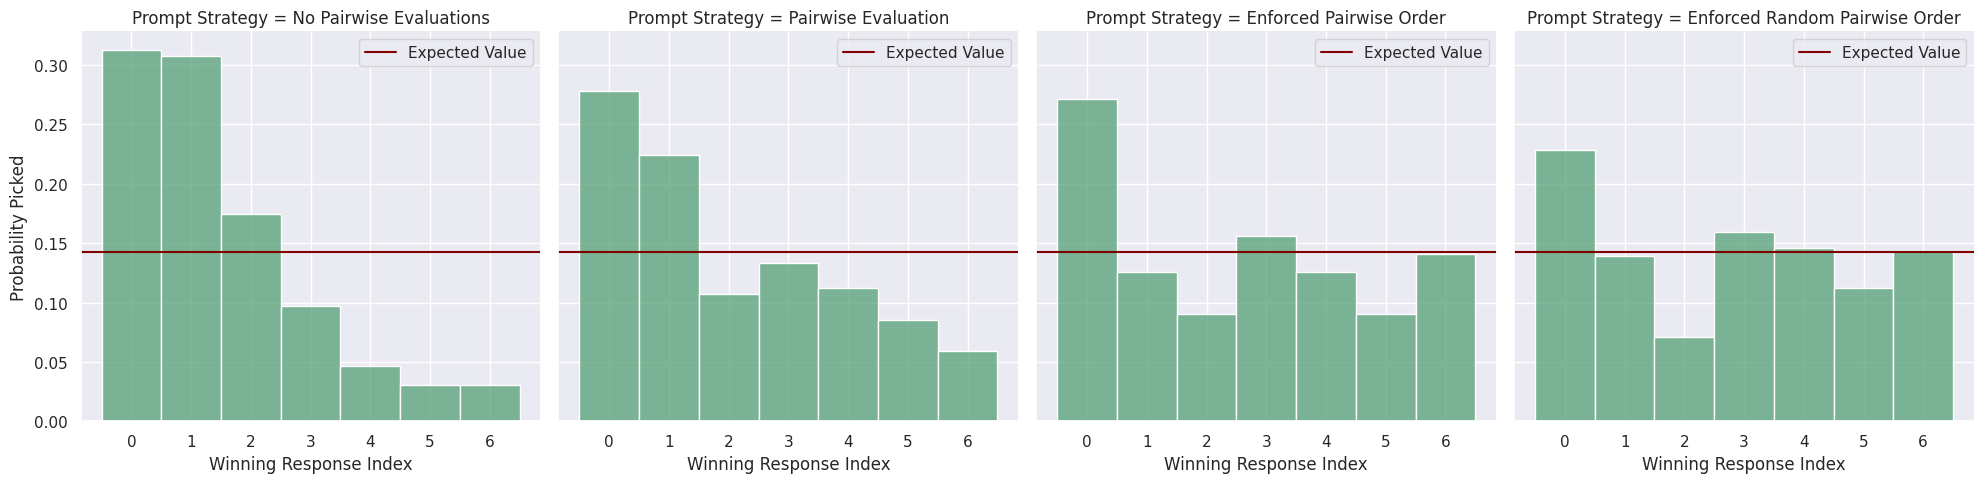

In [36]:
sns.set_theme(style="whitegrid")
sns.set_theme(rc={'figure.figsize':(10,5)})
sns.set_theme(font_scale=1)
gs = sns.displot(strat, x='winner', col='Prompt Strategy', kind='hist', stat='probability', discrete=True, multiple='dodge', common_norm=False, color=sns.light_palette("seagreen")[4])
for g in gs.axes[0]:
    g.axhline(y = 1/7, linestyle = '-', color='maroon', label="Expected Value")
    g.legend()
    g.set_xlabel('Winning Response Index')
    g.set_ylabel('Probability Picked')